# Linux Building Blocks

Containers leverage linux kernel features `cgroups` and `namespaces` to provide resource constraints and application isolation respectively. They also use an union filesystem that enables images to be built upon common layers, making building and sharing images fast and efficient.

Note: Docker did not invent containers. For example, [LXC containers](https://linuxcontainers.org/) was implemented in 2008, five years before Docker launched. That being said, Docker made huge strides in developer experience, which helped container technologies gain mass adoption and remains one the most popular containerization platforms.

# `Cgroups`

A Linux kernel feature which allow processes to be organized into hierarchical groups whose usage of various types of resources can then be limited and monitored.

With `cgroups`, a container runtime is able to specify that a container should be able to use (for example):
- Use up to XX% of CPU cycles (cpu.shares)
- Use up to YY MB Memory (memory.limit_in_bytes)
- Throttle reads to ZZ MB/s (blkio.throttle.read_bps_device)


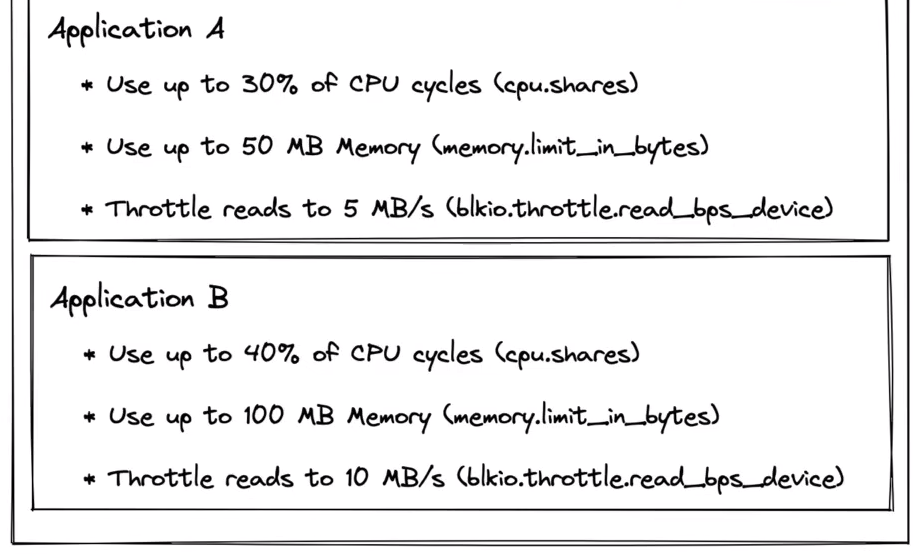

# `Namespaces`

A namespace wraps a global system resource in an abstraction that makes it appear to the processes within the namespace that they have their own isolated instance of the global resource.

Changes to the global resource are visible to other processes that are members of the namespace, but are invisible to other processes.

With `namespaces`, a container runtime is able to keep processes outside of the container invisible within the container or map the user inside the container to a different user on the host (among other things).

# Union filesystems

A union filesystem allows files and directories of separate file systems, known as branches, to be transparently overlaid, forming a single coherent file system.

Contents of directories which have the same path within the merged branches will be seen together in a single merged directory, within the new, virtual filesystem.

This approach allows for efficient use of space because common layers can be shared. For example, if multiple containers from the same image are created on a single host, the container runtime only has to allocate a thin overlay specific to each container, while the underlying image layers can be shared. More detail on understanding the implications of these filesystem on data persistence can be found in 04-using-3rd-party-containers.

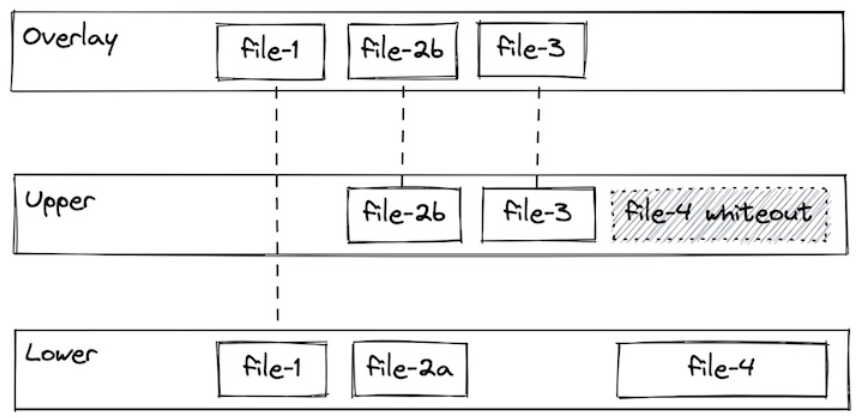

# Docker Application Architecture

It is useful to break down the various components within the Docker ecosystem. The first distinction to make is between "Docker Desktop" and "Docker Engine".

Docker Desktop is an application you install on development systems that provides:
- A client application:
    - Docker CLI (command line interface for interacting with Docker)
    - GUI for configuring various system settings
    - Credential helpers for accessing registries
    - Extensions (3rd party plugins)
- A Linux virtual machine containing:
    - Docker daemon (dockerd), exposing the Docker API
    - (Optional) Kubernetes cluster

Docker Desktop is free for personal use, but requires a subscription for certain commercial use cases.

Docker Engine refers to a subset of those component which are free and open source and can be installed only on Linux. Specifically Docker Engine includes:
- Docker CLI
- Docker daemon (dockerd), exposing the Docker API

Docker Engine can build container images, run containers from them, and generally do most things that Docker Desktop but is Linux only and doesn't provide all of the developer experience polish that Docker Desktop provides.

Container image registries are not part of Docker itself, but because they are the primary mechanism for storing and sharing container images it is worth including it here. Docker runs a registry named DockerHub, but there are many other registries as well.

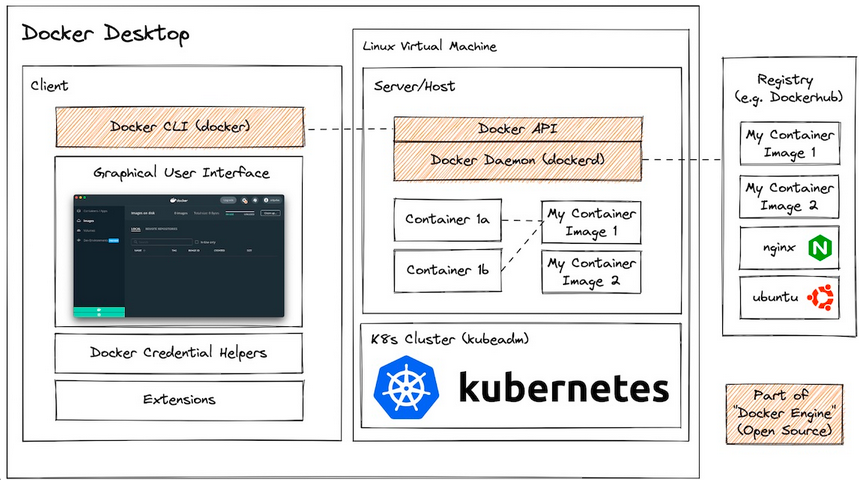